# **Case Presentation**

Dataset:

The dataset comprises 10,000 data points with 14 features. Each row contains a unique identifier (UID) from 1 to 10,000 and includes product IDs denoted as L, M, or H, representing low (50%), medium (30%), and high (20%) quality variants. Notable features include air and process temperatures generated through random walk processes, rotational speed calculated from power with added noise, torque values distributed around 40 Nm, and tool wear incremented based on product quality.

This dataset contains a 'machine failure' label linked to five distinct failure modes: tool wear failure, heat dissipation failure, power failure, overstrain failure, and random failures. The 'machine failure' label is set to 1 if any of these modes are true. These failure modes encompass various conditions such as specific torque and speed parameters, tool wear durations, and random failure chances. It's important to note that the exact failure mode triggering the machine failure is not explicitly discernible, posing a challenge for machine learning methods.

In summary, the dataset details various features and failure modes affecting machine failures, presenting a complex scenario for predictive analysis due to the presence of multiple, independent failure causes.

source: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

## Conclusions and Insights

# **Exploratory Data Analysis**

In [29]:
# Data ingestion:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/predictive_maintenance.csv')

In [30]:
# Overview of data:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [31]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [32]:
df.drop_duplicates();

In [33]:
products_uniques = df['Product ID'].value_counts()
products_uniques

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


As a first view, we can extract some information:

* There are no null or missing values
* There are three categorical variables
* There are no repeated products, therefore, we will eliminate this information in the future to work with machine learning algorithms

In [35]:
# Transforming Units of measure:
df['Air temperature [K]'] = (df['Air temperature [K]']-273.15)
df['Process temperature [K]'] = (df['Process temperature [K]']-273.15)
df = df.rename(columns={'Air temperature [K]': 'Air temperature [°C]', 'Process temperature [K]': 'Process temperature [°C]'})

In [36]:
# Let's remove UDI and Product ID
df = df.drop('UDI', axis=1)
df = df.drop('Product ID', axis=1)

In [37]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,24.95,35.45,1551,42.8,0,0,No Failure
1,L,25.05,35.55,1408,46.3,3,0,No Failure
2,L,24.95,35.35,1498,49.4,5,0,No Failure
3,L,25.05,35.45,1433,39.5,7,0,No Failure
4,L,25.05,35.55,1408,40.0,9,0,No Failure


In industry, time is gold so that, Let's use a library called: Sweetviz for doing our EDA faster.

We need to set in this library our target variable, in our case it will be *Target* that can take two values, O for non failure and 1 for failure.

This library creates for us a HTML report where we can see the main stadistics of our DataFrame as well as correlations and main descriptions.

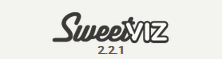

https://github.com/fbdesignpro/sweetviz

In [ ]:
# Installing sweetviz
!pip install sweetviz

In [ ]:
# Unsing sweetviz
import sweetviz

#using analyze
analyze_df = sweetviz.analyze([df, "df"], target_feat = 'Target')

In [40]:
# Showing results:
analyze_df.show_html('analyze.html')

from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Heatmap:**

Let's check the relationships between our DataFrames:

We can see how the most important part of our heatmap is the first row, where we apreciate how there is soft correlations between Target and Torque, Tool wear and Air Temperature.


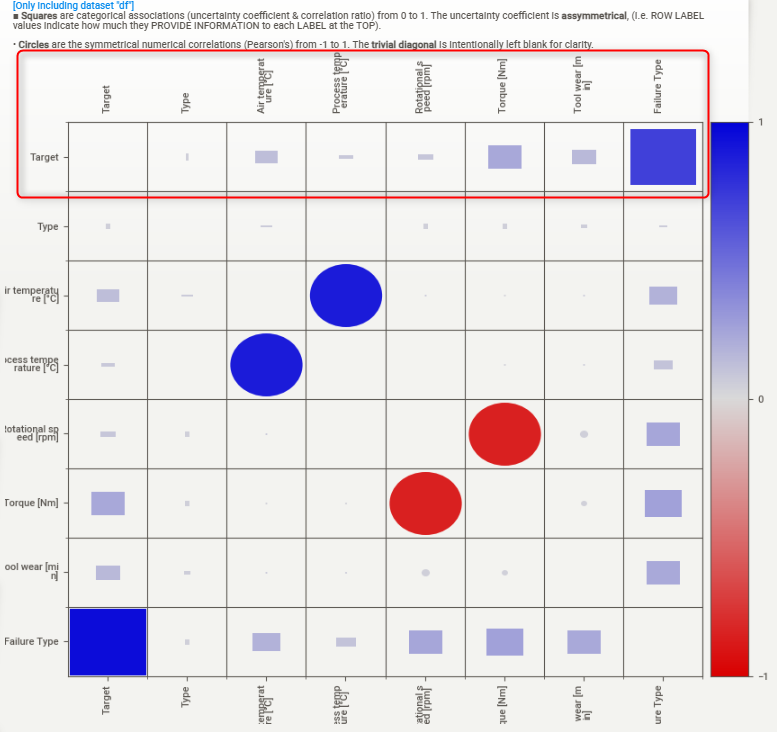

**Let's speak about each variable:**


**Target**

Target means that we have a failure in a product and it can take two values, 0 for no failure and 1 when a failure appears.

We can see that in our data set only 3% of the products have problems.

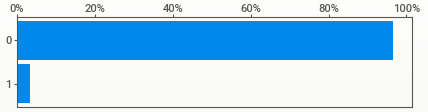

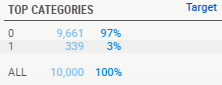

**Type**

Type represent the product quality. We have three quality types:

*   L, Low quality
*   M, Medium quality
*   H, High quality

On these figures, we can see how the product with more "problems" is the L that corresponds with less quality.

Product L can be even 50% less productive than product H.



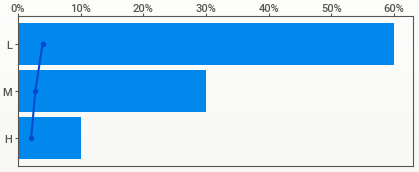

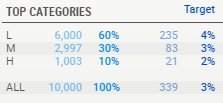

**Air Temperature [ºC]**

Air temperature as its name indicate, the temperature of the air close to our products.

As we are finding in the chart, we have to take special atention when the temperature is more than 28º (82,4ºF), because the failure tendency grows suddenly.  

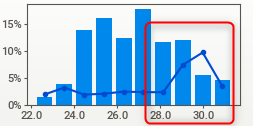

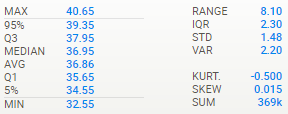

In our dataset, there is no context about where are placed our products, type of industry or production requeriments, however, one of our firts insight would be keep the temperature below 28º(82.4ºF)



**Process Temperature [ºC]**

Process temperature means the temperature of working from our products.

We should pay attention in the range between 36º(96.8ºF) and 40º(104ºF)

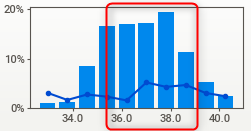

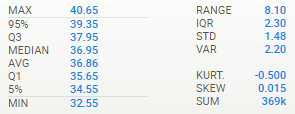



**Rotational speed [rpm]**

Rotational speed means the laps per minute of our machine spindle.

We should take attention when our products and machines are haveing overstrain failures.

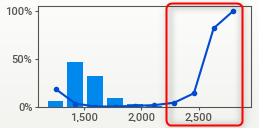



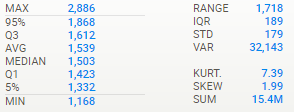





**Torque [Nm]**

Torque means the capacity of a motor for generating torson over a axis. Normally its unit of measure is Newtom-meter (Nm) or (lb-ft). For our purpose, let's consider torque as the force that the motor have to do for turning.

As well as Rotational speed, we need to control that our products are working between their ranges of production.

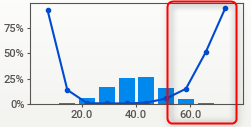

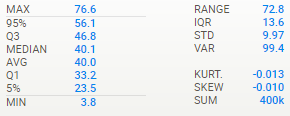

**Tool Wear [min]**

Tool wear [min] means the time that one tool is usig by our products in minutes.

We can asum that we can not use one tool more than 200 min (3,3hours)

From the time that we are using the tools, we can asum that our products would be tooling-machines like mechanical lathe machine or drill machine.   

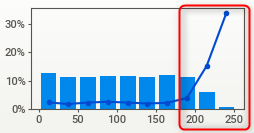

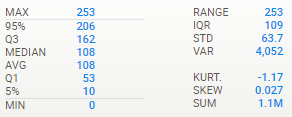


**Failure type**

Failure type make reference to the source of the failure. We can find the following in our data:

*   Heat Dissipation Failure
*   Power Failure
*   Overstrain Failure
*   Tool Wear Failure
*   Random Failure

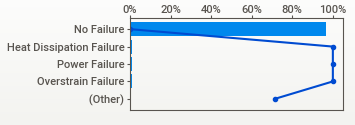

We can not appreciate the details of Failure type chart provided by Sweetviz, therefore, let's create a new chart:

In [41]:
# Let drop only in this example the non failure part of the data set:
non_failure_df = df[df['Failure Type']!='No Failure']

In [42]:
count_non_failure_by_product = non_failure_df.groupby('Failure Type')['Type'].count()
count_non_failure_by_product

Failure Type
Heat Dissipation Failure    112
Overstrain Failure           78
Power Failure                95
Random Failures              18
Tool Wear Failure            45
Name: Type, dtype: int64

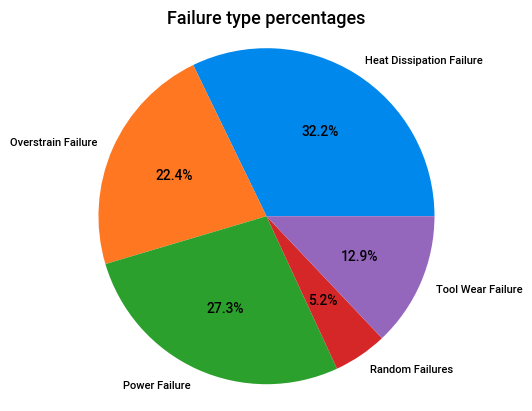

In [43]:
# Pie chart:
labels = count_non_failure_by_product.index
sizes = count_non_failure_by_product.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Failure type percentages', fontsize=13)
plt.axis('equal')

plt.show()

Considering the above pie chart, we can consider:

* The dissipation systems are not correctly dimensioned for their working conditions.
* The machine may be too small for the production needs, as 22% of failures are due to overstress or the production line not being set up correctly
* The feeding line needs to be overhauled or repaired.
* The tool preparation process needs to be reviewed.


**Let's check the Failures type per product type:**


In [44]:
L_failures = non_failure_df[non_failure_df['Type'] == 'L'].groupby('Failure Type')
M_failures = non_failure_df[non_failure_df['Type'] == 'M'].groupby('Failure Type')
H_failures = non_failure_df[non_failure_df['Type'] == 'H'].groupby('Failure Type')

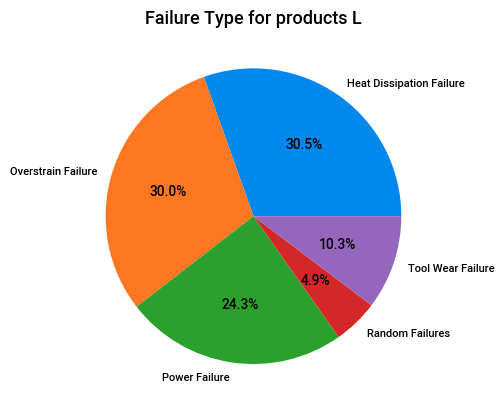

In [45]:
# Cuenta el número de ocurrencias en cada grupo
L_failures_count = L_failures.size()

# Crea el gráfico circular
plt.pie(L_failures_count, labels = L_failures_count.index, autopct='%1.1f%%')

# Añade un título con un tamaño de fuente más pequeño
plt.title('Failure Type for products L', fontsize=13)

# Muestra el gráfico
plt.show()

Considering the above pie chart, we can consider:

* The dissipation systems are not correctly dimensioned for their working conditions
* The machine may be undersized for the production requirements because 30% of the failures are due to overexertion
* The feed line needs to be overhauled or repaired
* The tooling set-up process needs to be reviewed

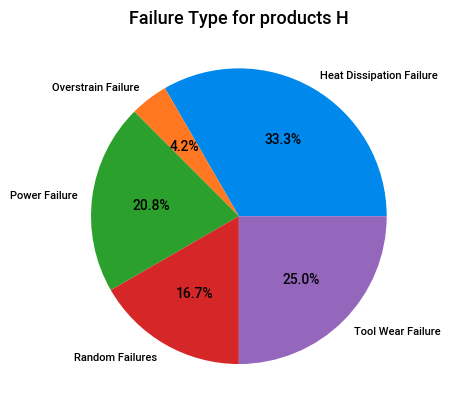

In [46]:
# Cuenta el número de ocurrencias en cada grupo
H_failures_count = H_failures.size()

# Crea el gráfico circular
plt.pie(H_failures_count, labels = H_failures_count.index, autopct='%1.1f%%')

# Añade un título con un tamaño de fuente más pequeño
plt.title('Failure Type for products H', fontsize=13)

# Muestra el gráfico
plt.show()

Considering the above pie chart, we can consider:

*   Definitely We need to review and develop a better set-up process for tooling. Could be a human error, or defects on design.
*   As well as before, dissipation systems is not working properly.
*   Power line could be checked.
*   Let's investigate the Random Failures.


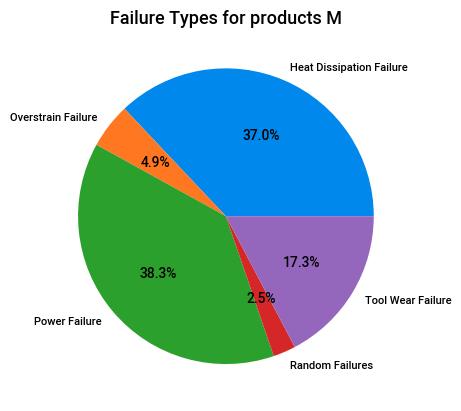

In [47]:
# Cuenta el número de ocurrencias en cada grupo
M_failures_count = M_failures.size()

# Crea el gráfico circular
plt.pie(M_failures_count, labels = M_failures_count.index, autopct='%1.1f%%')

# Añade un título con un tamaño de fuente más pequeño
plt.title('Failure Types for products M', fontsize=13)

# Muestra el gráfico
plt.show()

Considering the above pie chart, we can consider:

*   We need to review and develop a better set-up process for tooling.
*   As well as before, dissipation systems is not working properly.
*   Definetily we need to review or check the Power line.

**Including the economic dimension in the EDA:**

*  Assuming that our Mean time to fix a failure of this severity is 30min. Calculated including:  
    - MTTR: Mean time to response
    - MTTRep: Mean time to reparation
    - MTTRe: Mean time to recovery
*  Assumin that the time of collecting this dataset is 5 years

We have 10000/5 years: 2000 per year and a 3% of failure: 60 times per year.

60*30min = 1.800min per year our line stopped.

In money, and speaking about automotive industry:
  $22000*1800min = 39.600.000dollars

# **Predictions**

Let's try to predict throught various methods:

*   Logistics Regression
*   Decission trees
*   Random Forest
*   SVM
*   K-nearest neighbors (K-NN)
*   XGBoost

For achieving that our models works properly, we need to do some things before to train them.

1. Transform into numbers our categorical functions
2. Splitting our dataset into Target variable (*Failure Type*) and explicable variables
3. Splitting our dataset between train and test.

We will use the following metrics:
* Precision
* Recall
* F1-score
* Support





In [ ]:
#Let's start with the installation of the Category_encoders package.
!pip install category_encoders

In [48]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,24.95,35.45,1551,42.8,0,0,No Failure
1,L,25.05,35.55,1408,46.3,3,0,No Failure
2,L,24.95,35.35,1498,49.4,5,0,No Failure
3,L,25.05,35.45,1433,39.5,7,0,No Failure
4,L,25.05,35.55,1408,40.0,9,0,No Failure


In [49]:
# For transforming Type we will use OrdicalEnconder due to there is a hierarchy among L, M and Hight
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type'])
df = encoder.fit_transform(df)

# For transforming Failure type, we will use Label Encoders due to there are not a hierarchy among Failure Type.
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [122]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,24.95,35.45,1551,42.8,0,5
1,2,25.05,35.55,1408,46.3,3,5
2,2,24.95,35.35,1498,49.4,5,5
3,2,25.05,35.45,1433,39.5,7,5
4,2,25.05,35.55,1408,40.0,9,5


Our dataset has changed:

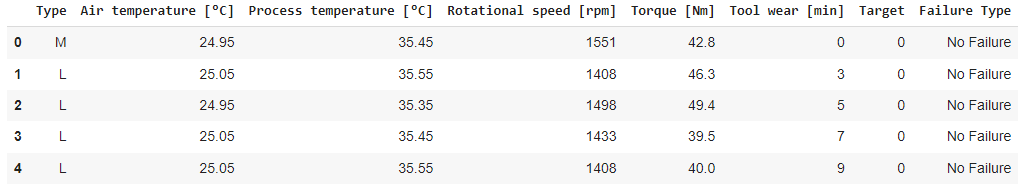

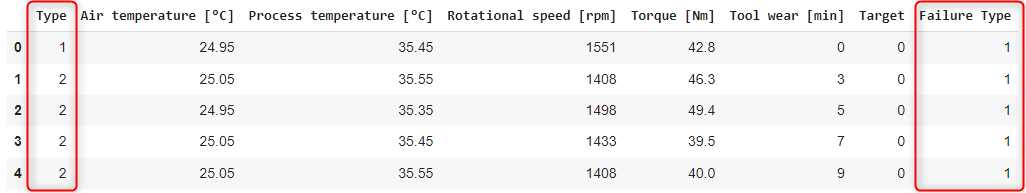

In [96]:
# Let's drop Target Variable:
df = df.drop(columns='Target', axis=1)

In [117]:
df1 = df['Failure Type'] = 0
df2 = df['Failure Type'] = 1
df3 = df['Failure Type'] = 2
df4 = df['Failure Type'] = 3
df5 = df['Failure Type'] = 4
df6 = df['Failure Type'] = 5

print(df1, df2, df3, df4, df5, df6)

0 1 2 3 4 5


In [97]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,24.95,35.45,1551,42.8,0,1
1,2,25.05,35.55,1408,46.3,3,1
2,2,24.95,35.35,1498,49.4,5,1
3,2,25.05,35.45,1433,39.5,7,1
4,2,25.05,35.55,1408,40.0,9,1


In [98]:
# Let's split our dataset between target variable:Failure Type (y) and explanatorial variables (X):
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

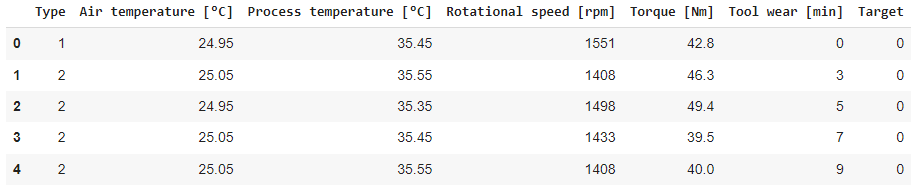

In [99]:
# Let's split our dataset into Train and test parts, the proporcion will be 80% for Training, 20% for testing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Logistics Regression Model:

In [ ]:
# Logistics regression Model:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression()       # Creating the model
lr.fit(X_train, y_train)        # Assigning model
y_pred_lr = lr.predict(X_test)  # Predicting model

log_train = round(lr.score(X_train, y_train) * 100, 2)            # Calculating percentajes
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)  # Calculating percentajes of Accuracy


cm = confusion_matrix(y_test, y_pred_lr)


print(f'Training Accuracy: {log_train}')
print(f'Model Accuracy:  {log_accuracy}')
print('Classification Report: \n', classification_report(y_test, y_pred_lr))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
# Importar librerías necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# Inicializar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}')

# Ahora, puedes utilizar este modelo entrenado para hacer predicciones con nuevos datos. Por ejemplo:
new_data_point = np.array([1, 24.95, 35.45,	1551,	42.8])
new_data_point_2d = new_data_point.reshape(1, -1)
prediction = model.predict(new_data_point_2d)
print(f'Predicción para los nuevos datos: {prediction}')

## Decision Tree Classifier:

Training Accuracy: 100.0
Model Accuracy: 99.45
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       1.00      1.00      1.00      1921
           2       0.93      0.88      0.90        16
           3       0.90      1.00      0.95        19
           4       0.00      0.00      0.00         3
           5       0.89      0.89      0.89         9

    accuracy                           0.99      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.99      0.99      0.99      2000



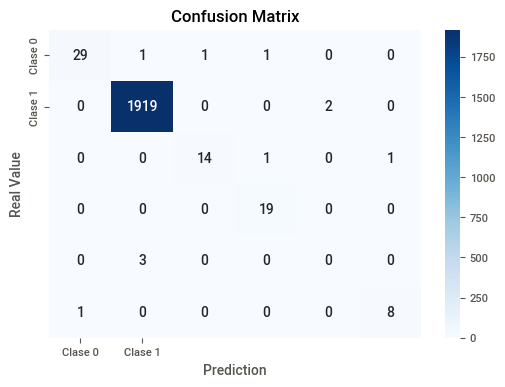

In [71]:
# Decision Tree:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

decisor = DecisionTreeClassifier()
decisor.fit(X_train, y_train)
y_pred = decisor.predict(X_test)

decisor_train = round(decisor.score(X_train, y_train)*100, 2)
decisor_accuracy = round(accuracy_score(y_pred, y_test)*100, 2)

print(f'Training Accuracy: {decisor_train}')
print(f'Model Accuracy: {decisor_accuracy}')
print("Classification_Report: \n",classification_report(y_test,y_pred))


#Confusion Matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier:

Training Accuracy: 100.0
Model Accuracy: 98.4
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.98      1.00      0.99      1921
           2       0.92      0.69      0.79        16
           3       0.95      1.00      0.97        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         9

    accuracy                           0.98      2000
   macro avg       0.64      0.55      0.58      2000
weighted avg       0.98      0.98      0.98      2000



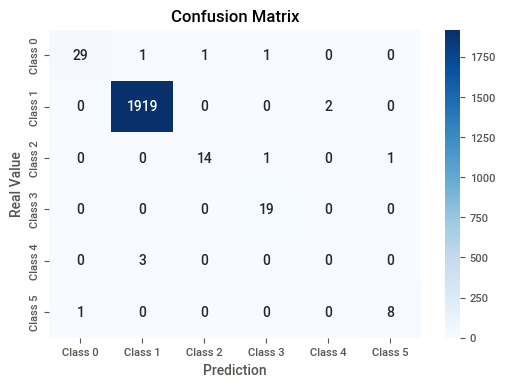

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print(f'Training Accuracy: {random_forest_train}')
print(f'Model Accuracy: {random_forest_accuracy}')
print("Classification_Report: \n", classification_report(y_test,y_pred_rf))


#Confusion Matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize conf_matrix wiht seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

## Support vector machine Clasiffier:

Training Accuracy: 96.64
Model Accuracy: 96.05
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.96      1.00      0.98      1921
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000



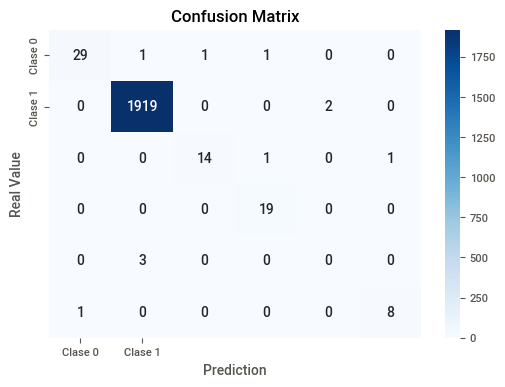

In [72]:
#SVM:

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train)*100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test)*100, 2)

print(f'Training Accuracy: {svc_train}')
print(f'Model Accuracy: {svc_accuracy}')
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))


#Confusion Matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

## K-nearest neighbors (K-NN):


## XGBoost:

## Model Building:

In [75]:
#models

models = pd.DataFrame({'Model':['Support Vector Machines', 'Random Forest', 'Decision Tree'],
                       'Training Accuracy': [svc_train, decisor_train, random_forest_train],
                       'Model Accuracy Score': [svc_accuracy, decisor_accuracy, random_forest_accuracy]})

In [76]:
pd.options.display.precision= 2
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
2,Decision Tree,100.00,99.60
1,Random Forest,100.00,99.45
0,Support Vector Machines,96.64,96.05


In [77]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[1 1 1 ... 1 1 1]


In [79]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{'color': 'LigntGreen'})


,Actual,Predicted
6712,1,1
9694,1,1
3365,1,1
2398,1,1
9577,1,1


# **Deployment of the best model, in our case: Random Forest Classifier:**

## Creating an pretrained deployable model with ONNX:

In [ ]:
# Let's transform our model built in our Jupyter notebook into a interactive model pretrained for deploying it.
# The new format will be ONNX

# Installing skl2onnx:
!pip install skl2onnx

In [103]:
# Building the pretrained model:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Model is random_forest and X_train is train data:
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onx = convert_sklearn(random_forest, initial_types=initial_type)

with open("random_forest.onnx", "wb") as f:
    f.write(onx.SerializeToString())

## Building the interactive mode:

In [85]:
# Building the interactive mode:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.4 MB/s eta 0:00:00


In [104]:
import onnxruntime as rt
import numpy as np

# Loading random_forest.onnx
sess = rt.InferenceSession("random_forest.onnx")

# Input data:
input_data = np.array([1, 24.95, 35.45, 1551,	42.8, 0], dtype=np.float32)
input_data = input_data.reshape(1, -1)

# Input-Output Name
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

# Execute and results:
result = sess.run([output_name], {input_name: input_data})


In [105]:
result

[array([1], dtype=int64)]

## Building a API for interacting with our model with FastAPI

In [126]:
!pip install fastapi uvicorn

In [134]:
# For eliminating errors:
!pip install typing-extensions --upgrade

In [135]:
!pip install typing_extensions==4.8.0 --force-reinstall


  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
tensorflow 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"Hello": "World"}


In [136]:
from fastapi import FastAPI
import numpy as np
import onnxruntime as rt
from pydantic import BaseModel

class Item(BaseModel):
    input: list

app = FastAPI()

# loading model in onnx format:
sess = rt.InferenceSession("random_forest.onnx")

@app.post('/predict')
def predict(item: Item):
    # Input data
    input_data = np.array(item.input, dtype=np.float32)

    # Input/output names:
    input_name = sess.get_inputs()[0].name
    output_name = sess.get_outputs()[0].name

    # Executing our model:
    result = sess.run([output_name], {input_name: input_data})

    # Returning our answer in JSON format:
    return {'prediction': result.tolist()}


ImportError: ignored

In [ ]:
# 1. Containerizing our FastAPI:
# Create a requirement.txt with:  at least:
  # fastapi
  # uvicorn
  # onnxruntime
  # numpy
  # pydantic

# Using Python defult imagen:
FROM python:3.8-slim-buster

# Work directory:
WORKDIR /app

# requirements.txt file copy and instaling dependencies:
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# all archives copy:
COPY . .

# Expose port of execution:
EXPOSE 8000

# comand for execute the application
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"] # main:app should be change for our app ubication.



# 2. Docker build -t my_fastapi_app .       # my_fastapi_app will be the name of the container.

# 3. Docker run -p 8000:8000 my_fastapi_app    # will be the execution of the api.